### Установка пакетов

In [1]:
%pip install pandas matplotlib seaborn openpyxl faker xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datetime import datetime, timedelta
from faker import Faker 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
import openpyxl
import seaborn as sns
import numpy as np
import os
import datetime
from dateutil.relativedelta import relativedelta

### Настройка окружения

In [3]:
fake = Faker()
dt_specie = pd.read_excel("C:/Users/Sonya/Documents/Практика/Jupyter/specie_data.xlsx")
dt_post = pd.read_excel("C:/Users/Sonya/Documents/Практика/Jupyter/post_data.xlsx")

In [4]:
dt_specie.info()
dt_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         75 non-null     object 
 1   Adult height    75 non-null     float64
 2   Child's height  75 non-null     float64
 3   Adult weight    75 non-null     float64
 4   Child's weight  75 non-null     float64
 5   Lifespan        75 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post        5 non-null      object
 1   min_salary  5 non-null      int64 
 2   max_salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [5]:
dt_specie.to_numpy()
dt_post.to_numpy()

array([['cleaners', 50000, 100000],
       ['veterinarians', 80000, 140000],
       ['trainers', 80000, 140000],
       ['construction repairmen', 50000, 100000],
       ['administration workers', 60000, 120000]], dtype=object)

### Массивы 

In [6]:
# provider
companyName_arr = ["Pet Paradise", "Paws and Claws Emporium", "Furry Friends Haven", "The Critter Corner",
                   "Whiskers & Wags", "Creature Comforts Co.", "The Pet Haven", "Animal Antics Store",
                   "Happy Tails Emporium", "Paw Prints Boutique", "The K9 Kingdom", "The Purrfect Place",
                   "Furball Frenzy", "Feathers & Fins Emporium", "Pet Palooza Store", "Wild Whiskers Shop",
                   "The Pet Nest", "Safari Pets Store", "Wags to Whiskers", "Critter Craze Corner", "The Paw Pad",
                   "Furry Fins Market", "Creature Comfort Co.", "The Loyal Companion", "Happy Hounds Haven",
                   "Purrfect Paws Boutique", "Animal Magic Store", "The Critter Clubhouse", "Whisker Wonderland",
                   "Furry Friends’ Faves", "The Pet Stop Shop", "Tails & Scales Emporium", "Pet Parade Place",
                   "Wild Wags Market", "Feathered Friends Haven", "The Pet Patch", "Zoo-tastic Store",
                   "Bark and Meow Emporium", "Finned Friends’ Corner", "Wagging Whiskers", "Pet Central Place",
                   "Whisker Wonders Shop", "Furry Finery Store", "The Pet Perch", "Tail Waggers’ Emporium",
                   "Creature Comforts Haven", "Happy Howls Boutique", "Feathered Frenzy Corner", "The Pet Carousel",
                   "Paws and Scales Emporium", "Critter Capers Store", "The Pet Zone", "Fluffy Friends’ Fun",
                   "The Jungle Pets Store", "Finned Finds Emporium", "Wagging Tail Treasures", "Paw Prints Emporium",
                   "The Pet Oasis", "Whisker Wonderland Store", "Furry Favorites Emporium", "ZooGalore", "PawsRUs",
                   "CritterCraze", "ThePetPantry", "FurEverFriends", "WhiskerWorld", "PurrFectPlace", "WildWagsMart",
                   "FeatheredFinds", "TheCritterClub", "HappyTailsHaven", "PetParadise", "FurryFriendsEmporium",
                   "AnimalAnticsShop", "TailWaggersDelight", "ThePetNest", "SafariPetSupplies", "BarkAndMeowMart",
                   "WhiskerWonderland", "CreatureComfortsCo", "PawprintsBoutique", "FinsAndFeathersStore", "PetPalooza",
                   "FurballFrenzy", "TheHappyHowl", "HoundHeaven", "MansionOfMeows", "BeaksAndSqueaks",
                   "CritterCarnival", "CritterCreations", "PawsomePlace", "WildWhiskers", "FishAndChipsShop",
                   "PurrfectionStore", "PetParlor", "WingsAndTails", "ThePetStop", "FluffyFriendsWorld",
                   "FeatheredFriendsFantasy", "HappyPawsPetStore", "FurryFinsCorner", "TailsAndWhales",
                   "PawAndClawCreations", "CreatureCommune", "NoseToTailTreats", "ThePetPatch",
                   "RainingCatsAndDogsShop", "CritterCabana", "ExoticCritterCorner", "PurrfectPawsPlace",
                   "AnimalEnchantment", "CritterCoveMarket", "PetPleasantries", "TheRabbitHutch", "WildlifeWonderland",
                   "RoyalReptilesShop", "TropicalTreats", "CritterCrazyCloset", "WhiskerWishes", "PawsAndPlay",
                   "AnimalAlley", "CritterComforts", "FinsAndFriendship", "PawprintsParadise", "ThePetPerch",
                   "TheDoggyDen", "ClawAndOrderStore", "FurryFortune", "WhiskerWagsWarehouse", "AvianAvenues",
                   "BarkBoutique", "CritterCarousel", "EnchantedEars", "ZooZenith", "TailsOfJoy", "CreatureCollection",
                   "CritterCubbyhole", "ReptileRendezvous", "FurryFiesta", "PawPleasures", "CritterComfort",
                   "FeatheredFriendsFusion", "ThePetPiazza", "FinsAndPawsPlaza", "WhiskerWorldWide", "CritterCottage",
                   "PawsAndPurrfections", "ThePamperedPet", "WildWhispers", "BirdBazaar", "FurryFeathers",
                   "PurrsAndWhiskers", "WaggingTailTreasures", "FeatheredFunStore", "ThePetOasis",
                   "TailsAndScalesSanctuary"]

# zoo
country = ["United States", "Canada", "United Kingdom", "Australia", "Germany", "France", "Japan", "China",
           "Brazil", "India", "Italy", "Russia", "South Africa", "Mexico", "Spain", "Netherlands", "Switzerland",
           "Sweden", "South Korea", "Argentina", "New Zealand", "Norway", "Singapore", "Ireland", "Denmark",
           "Belgium", "Finland", "Austria", "Chile", "Portugal"]
city = ["New York", "Toronto", "London", "Sydney", "Berlin", "Paris", "Tokyo", "Beijing", "Sao Paulo", "Mumbai",
        "Rome", "Moscow", "Cape Town", "Mexico City", "Madrid", "Amsterdam", "Zurich", "Stockholm", "Seoul",
        "Buenos Aires", "Auckland", "Oslo", "Singapore", "Dublin", "Copenhagen", "Brussels", "Helsinki", "Vienna",
        "Santiago", "Lisbon"]
zooName = ["Central Park Zoo", "Toronto Zoo", "London Zoo", "Taronga Zoo", "Berlin Zoological Garden",
           "Paris Zoological Park", "Ueno Zoo", "Beijing Zoo", "Sao Paulo Zoo", "Sanjay Gandhi National Park",
           "Bioparco di Roma", "Moscow Zoo", "Cape of Good Hope Nature Reserve", "Chapultepec Zoo",
           "Madrid Zoo Aquarium", "Artis Amsterdam Royal Zoo", "Zoo Zürich", "Skansen Open-Air Museum and Zoo",
           "Seoul Grand Park Zoo", "Lujan Zoo", "Auckland Zoo", "Oslo Reptile Park", "Singapore Zoo", "Dublin Zoo",
           "Copenhagen Zoo", "Planckendael Zoo", "Helsinki Zoo", "Tiergarten Schönbrunn Zoo",
           "Parque Metropolitano de Santiago", "Lisbon Zoo"]

# staff
name = ["Abigail", "Alexander", "Amelia", "Andrew", "Anna", "Anthony", "Ava", "Benjamin", "Charlotte",
        "Christopher", "Claire", "Daniel", "David", "Elizabeth", "Emily", "Emma", "Ethan", "Grace", "Hannah",
        "Henry", "Isabella", "Jacob", "James", "Joseph", "Joshua", "Liam", "Lily", "Lucas", "Madison", "Mason",
        "Matthew", "Mia", "Michael", "Natalie", "Noah", "Oliver", "Olivia", "Owen", "Ryan", "Samuel", "Sarah",
        "Sophia", "Thomas", "Victoria", "William", "Abigail", "Alexander", "Amelia", "Andrew", "Anna", "Anthony",
        "Ava", "Benjamin", "Charlotte", "Christopher", "Claire", "Daniel", "David", "Elizabeth", "Emily", "Emma",
        "Ethan", "Grace", "Hannah", "Henry", "Isabella", "Jacob", "James", "Joseph", "Joshua", "Liam", "Lily",
        "Lucas", "Madison", "Mason", "Matthew", "Mia", "Michael", "Natalie", "Noah", "Oliver", "Olivia", "Owen",
        "Ryan", "Samuel", "Sarah", "Sophia", "Thomas", "Victoria", "William", "Abigail", "Alexander", "Amelia",
        "Andrew", "Anna", "Anthony", "Ava", "Benjamin", "Charlotte", "Christopher", "Claire", "Daniel", "David",
        "Elizabeth", "Emily", "Emma", "Ethan", "Grace", "Hannah", "Henry", "Isabella", "Jacob", "James", "Joseph",
        "Joshua", "Liam", "Lily", "Lucas", "Madison", "Mason", "Matthew", "Mia", "Michael", "Natalie", "Noah",
        "Oliver", "Olivia", "Owen", "Ryan", "Samuel", "Sarah", "Sophia", "Thomas", "Victoria", "William",
        "Alexandra", "Alice", "Amber", "Ashley", "Audrey", "Austin", "Avery", "Brandon", "Brian", "Brooklyn",
        "Caleb", "Caroline", "Chloe", "Christian", "Christopher", "Claire", "Daniel", "David", "Eleanor", "Elijah",
        "Elizabeth", "Ella", "Ethan", "Evelyn", "Gabriel", "Grace", "Hailey", "Hannah", "Isaac", "Isabella", "Jack",
        "Jackson", "Jacob", "James", "Jason", "Jennifer", "John", "Jonathan", "Julia", "Julian", "Katherine",
        "Kevin", "Laura", "Lauren", "Leah", "Leo", "Levi", "Liam", "Lillian", "Alexander", "Alexey", "Andrey", "Anton",
        "Artem", "Boris", "Vasiliy", "Vladimir", "Georgy", "Gregory", "Denis", "Dmitry", "Evgeny", "Ivan", "Igor",
        "Ilya", "Kirill", "Konstantin", "Leo", "Leonid", "Maksim", "Michael", "Nikita", "Nikolay", "Oleg", "Pavel",
        "Peter", "Novel", "Sergei", "Stanislav", "Stepan", "Timofey", "Fedor", "Philip", "Yuri", "Yakov", "Abram",
        "Adam", "Azariy", "Akim"]
surname = ["Anderson", "Brown", "Clark", "Davis", "Evans", "Foster", "Garcia", "Hall", "Jackson", "Johnson", "King",
           "Lee", "Martinez", "Miller", "Moore", "Nelson", "Parker", "Robinson", "Rodriguez", "Smith", "Taylor",
           "Thomas", "Thompson", "Walker", "White", "Williams", "Wilson", "Young", "Adams", "Allen", "Baker",
           "Bennett", "Brooks", "Carter", "Cook", "Cooper", "Cruz", "Davis", "Edwards", "Flores", "Gonzalez",
           "Gray", "Green", "Harris", "Hernandez", "Hughes", "James", "Jenkins", "Jones", "Kelly",
           "Zhulev", "Romanyugin", "Atgeriev", "Rybakin", "Belonosov", "Litovtsev", "Pupynin", "Silin", "Fortieth",
           "Bakhterev", "Losenkov", "Efimkin", "Fedkov", "Muldakhmetov", "Perko", "Burziev", "Kornilin", "Podgorsky",
           "Samborsky", "Nozdrovsky", "Merezhnikov", "Aleshchukin", "Gudochkin", "Vitovsky", "Mamchenko", "Burmatov",
           "Malinovsky", "Aeroplanes", "Karachentsev", "Nikonorov", "Nurkadilov", "Borisevich", "Voropanov",
           "Abzalilov", "Skorobogatykh", "Balobin", "Baranyuk", "Barchukov", "Shvedchikov", "Kosyakov", "Antonikov",
           "Makar", "Borilko", "Bazylin", "Soloshenko", "Batalin", "Umergalin", "Murzaev", "Zhuravok", "Poskrebyshev"]

### Создание класса итератора

In [7]:
class StaffRowGenerator:
    def __init__(self, posts, n_staffs):
        self._posts = posts
        self._n_staffs = int(n_staffs)
        self._state_posts = 0
        self._state_cur_staffs = 0

    def __iter__(self):
        return self

    def __next__(self):
        surname = self.gen_surname()
        name = self.gen_name()
        patronymic = self.gen_name()
        gender = self.gen_gender()
        date_of_birth = self.gen_birthday()
        date_of_employment = self.gen_date_of_employment(date_of_birth)
        post = self.gen_post()
        salary = self.gen_salary(post)

        row = [surname, name, patronymic, gender, date_of_birth.strftime('%Y-%m-%d'), date_of_employment.strftime('%Y-%m-%d'), salary, post]

        self.update_state()

        return row

    def update_state(self):
        if self._state_cur_staffs == self._n_staffs:            
            if self._state_posts == len(self._posts) - 1:
                self._state_cur_staffs = 0
                self._state_posts = 0
            else:
                self._state_cur_staffs = 0
                self._state_posts += 1
        else:
            self._state_cur_staffs += 1

    def generate_date(self, start_date, end_date):
        return fake.date_time_between(start_date=start_date, end_date=end_date)

    def gen_surname(self):
        return random.choice(surname)

    def gen_name(self):
        return random.choice(name)

    def gen_gender(self):
        numb = random.randint(1, 100)
        if numb >= 50:
            return 'M'
        else:
            return 'F'

    def gen_birthday(self):
        min_age = datetime.datetime(2005,1,9)
        max_age = datetime.datetime(1950,1,1)
        birth_date = self.generate_date(max_age,min_age)
        return birth_date

    def gen_date_of_employment(self, birthday):
        years = 18
        date_malalaia = birthday +  timedelta(days=years * 365.2425)
        date_of_employment = self.generate_date(date_malalaia, datetime.datetime.now())
        return date_of_employment
        

    def gen_post(self):
        post = self._posts['post'][self._state_posts]
        return post

    def gen_salary(self, post):
        if post:
            return round(random.uniform(self._posts["min_salary"][self._state_posts], self._posts['max_salary'][self._state_posts]), 2)
        else:
            return round(random.uniform(1.0, self._posts["min_salary"][self._state_posts]), 2) 

### Генерация данных

In [8]:
n_staffs = 7
staff_generator = StaffRowGenerator(dt_post, n_staffs)

In [9]:
your_path = 'C:/Users/Sonya/Documents/Практика/Jupyter/'
num_rows = 490

In [10]:
def create_file(file_path, header,  num_rows):
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        workbook = writer.book
        worksheet = workbook.add_worksheet()
        worksheet.write_row(0, 0, header)
        for i in range(num_rows):
            row_data = staff_generator.__next__()
            worksheet.write_row(i + 1, 0, row_data)

In [11]:
staffs_file_path = your_path + 'Staff.xlsx'
create_file(staffs_file_path, ['surname', 'name', 'patronymic', 'gender', 'date_of_birth', 'date_of_employment', 'salary', 'post'], num_rows)

### Анализ сгенерированных данных

In [12]:
dt_staff = pd.read_excel("C:/Users/Sonya/Documents/Практика/Jupyter/Staff.xlsx")

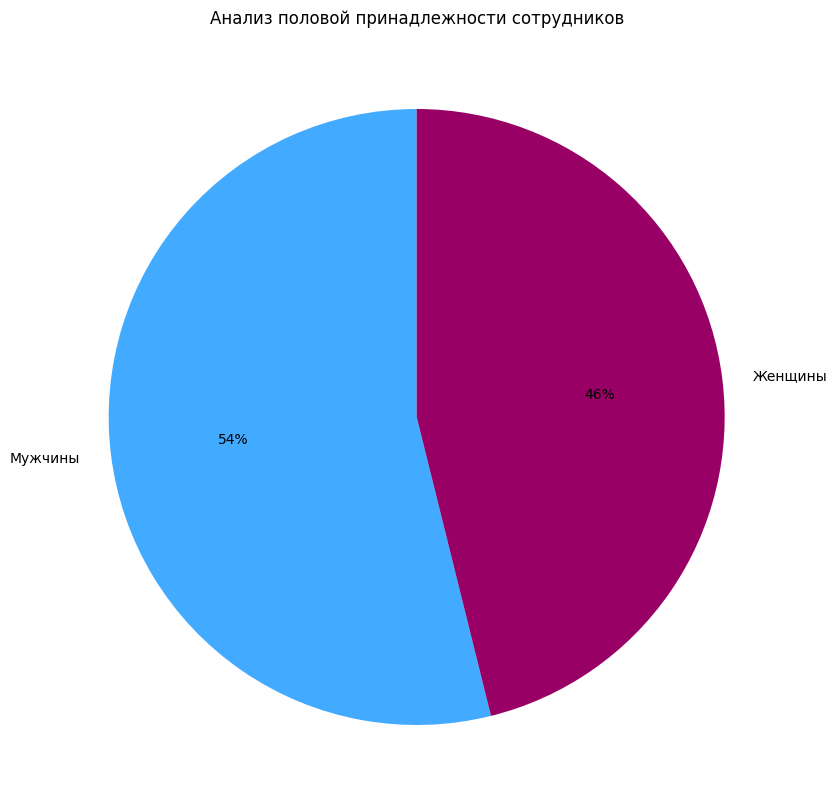

In [13]:
gender_counts = dt_staff['gender'].value_counts()

labels = ['Мужчины', 'Женщины']
colors = ['#42aaff', '#990066']

gender_mapping = {'M': 'Мужчины', 'F': 'Женщины'}
dt_staff['gender_label'] = dt_staff['gender'].map(gender_mapping)

plt.figure(figsize=(10, 10), facecolor='White')
plt.pie(gender_counts, labels=labels, autopct='%0.0f%%', startangle=90, colors=colors)
plt.title('Анализ половой принадлежности сотрудников')
plt.show()

    Проведя анализ сотрудников зоопарка, на гистограмме наглядно видно, что сотрудников мужского пола больше, чем женского.

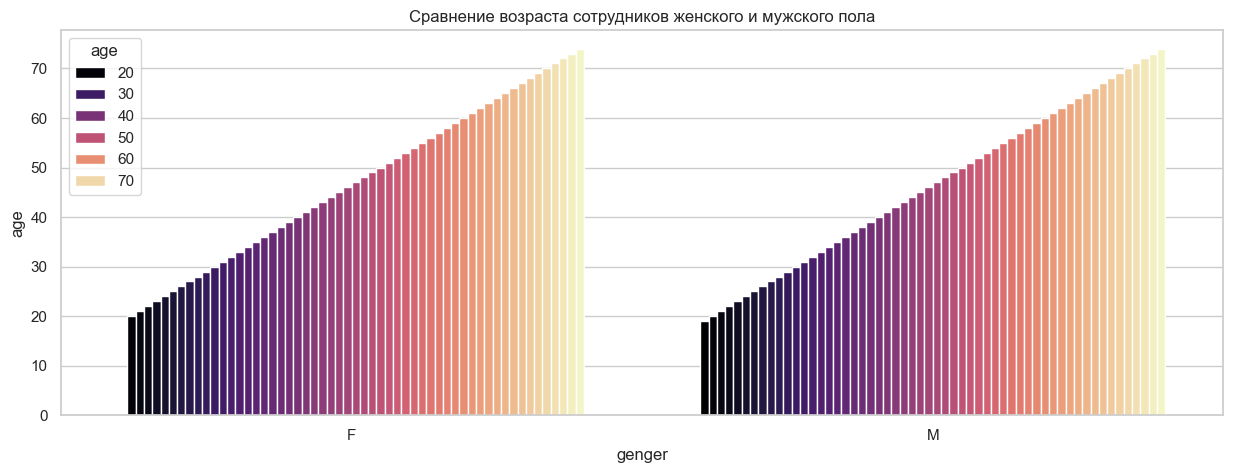

In [14]:
# Рассчитываем возраст по дате рождения
current_date = datetime.datetime.now()
dt_staff['age'] = current_date.year - pd.to_datetime(dt_staff['date_of_birth']).dt.year

# Устанавливаем цветовую палитру
sns.color_palette("magma")

# Устанавливаем стиль
sns.set(style="whitegrid")

# Рисуем столбчатую диаграмму
plt.figure(figsize=(15, 5))
sns.barplot(y='age', x='gender', hue='age', data=dt_staff, palette="magma")

# Настройка меток и подписей осей
plt.title('Сравнение возраста сотрудников женского и мужского пола')
plt.ylabel('age')
plt.xlabel('genger')
plt.show()

    По анализу возраста сотрудников можно сказать, что и у мужчин, и у женщин присутствует положительная асимметрия. Чем больше возраст, тем больше количество сотрудников данного возраста.

In [15]:
dt_staff.head(3)

,surname,name,patronymic,gender,date_of_birth,date_of_employment,salary,post,gender_label,age
0,Losenkov,Anna,Novel,F,1981-01-13,2016-12-02,70396.85,cleaners,Женщины,43
1,Nikonorov,Matthew,Mason,M,2001-12-08,2020-05-29,56634.54,cleaners,Мужчины,23
2,Carter,Grace,Andrey,M,1965-10-04,1988-08-10,79673.86,cleaners,Мужчины,59


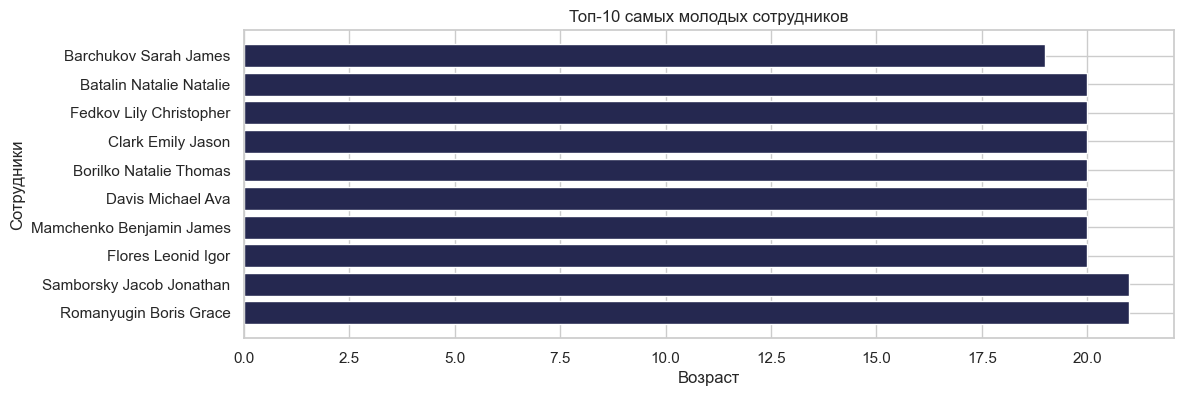

In [20]:
# Сортировка данных по возрасту и выбор топ-10 самых молодых сотрудников
top_youngest = dt_staff.sort_values('age').head(10)

# Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(12, 4))
plt.barh(top_youngest['surname'] + ' ' + top_youngest['name'] + ' ' + top_youngest['patronymic'], top_youngest['age'], color='#252850')
plt.xlabel('Возраст')
plt.ylabel('Сотрудники')
plt.title('Топ-10 самых молодых сотрудников')
plt.gca().invert_yaxis()  # Разворачиваем ось y для отображения самого молодого сверху
plt.show()

    На графике выше показаны топ-10 самых молодых сотрудников. 